## Import Library

In [140]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

## Data Understanding

In [122]:
# Read Dataset
df_customer = pd.read_csv('dataset/customer.csv', delimiter=';')
df_product = pd.read_csv('dataset/product.csv', delimiter=';')
df_store = pd.read_csv('dataset/store.csv', delimiter=';')
df_transaction = pd.read_csv('dataset/transaction.csv', delimiter=';')

In [123]:
# Merge Dataset
df_merge = pd.merge(df_transaction, df_customer, on=['CustomerID'])
df_merge = pd.merge(df_merge, df_product, on=['ProductID'])
df_merge = pd.merge(df_merge, df_store, on=['StoreID'])

In [124]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'], format="%d/%m/%Y")

In [125]:
df = df_merge.groupby(['Date', 'ProductID'])['Qty'].sum().reset_index()
df

,Date,ProductID,Qty
0,2022-01-01,P1,11
1,2022-01-01,P10,1
2,2022-01-01,P2,6
3,2022-01-01,P3,4
4,2022-01-01,P4,4
...,...,...,...
2661,2022-12-31,P3,8
2662,2022-12-31,P6,1
2663,2022-12-31,P7,12
2664,2022-12-31,P8,4


In [132]:
# Mendapatkan daftar unik product ID dan jumlahnya
product_ids = df['ProductID'].unique()
num_product_ids = len(product_ids)

# Membuat palet warna
color_palette = sns.color_palette('husl', num_product_ids)

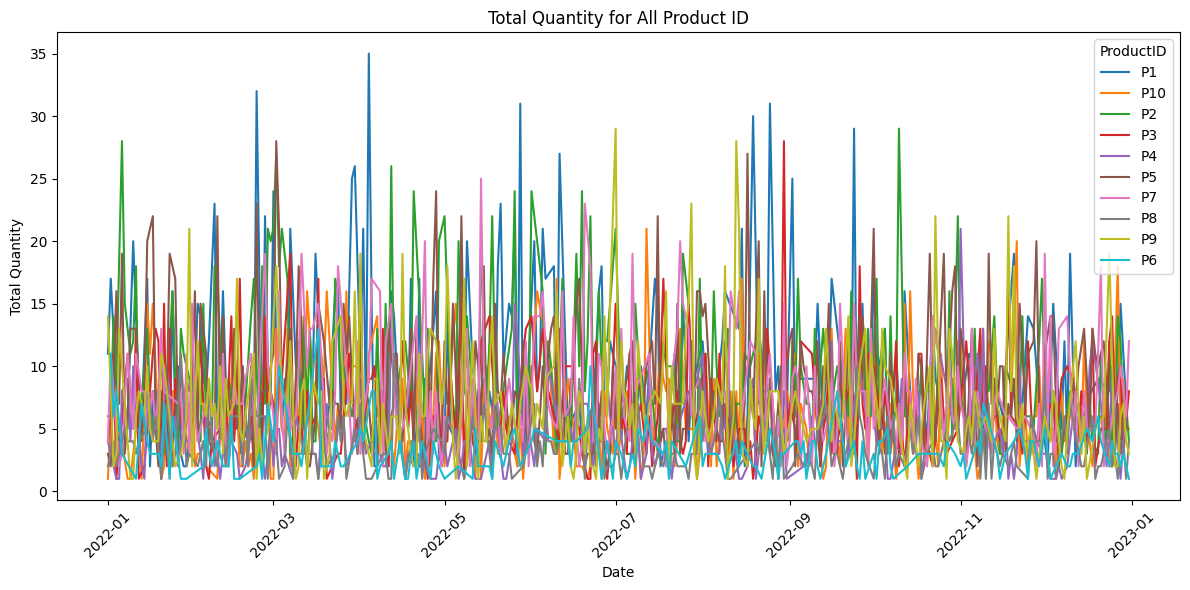

In [148]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Qty', hue='ProductID', data=df, color=color_palette)
plt.title(f'Total Quantity for All Product ID')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

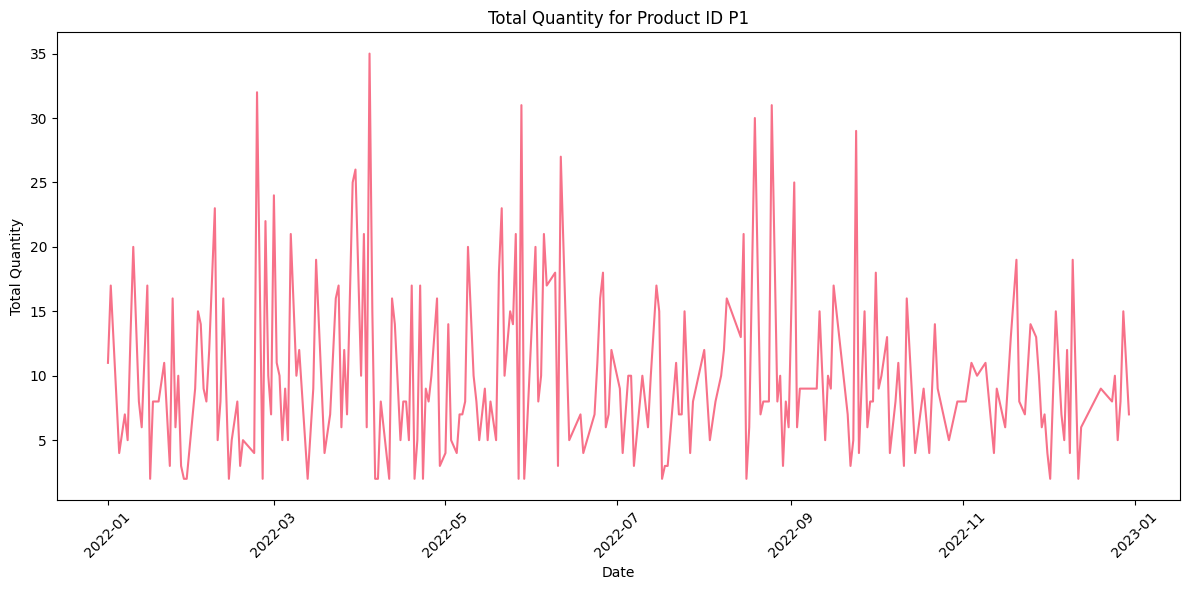

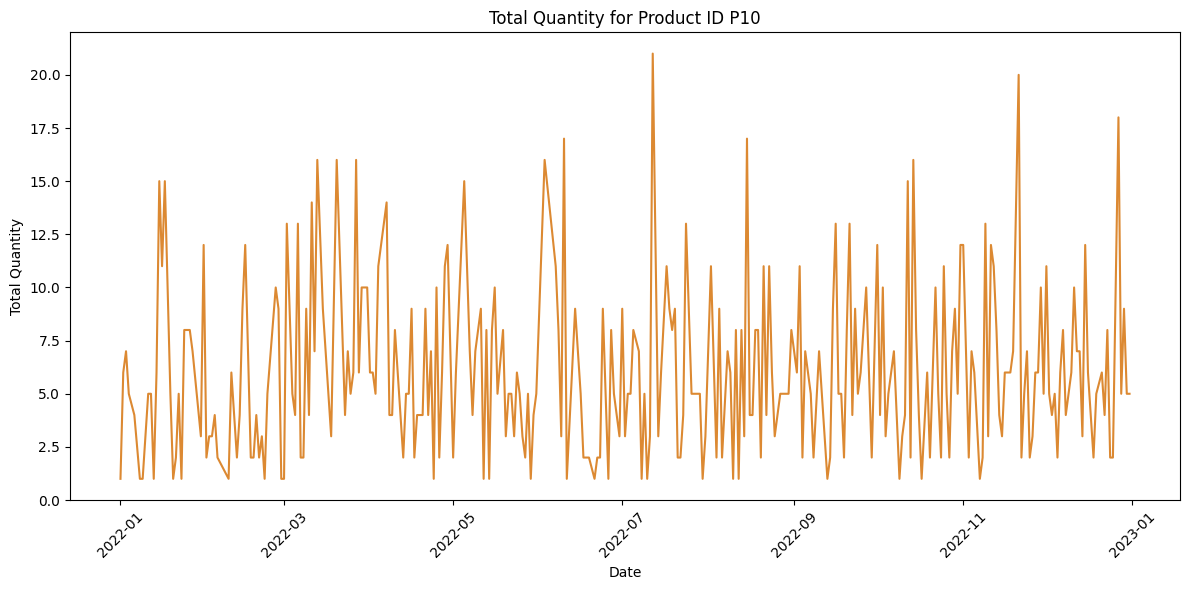

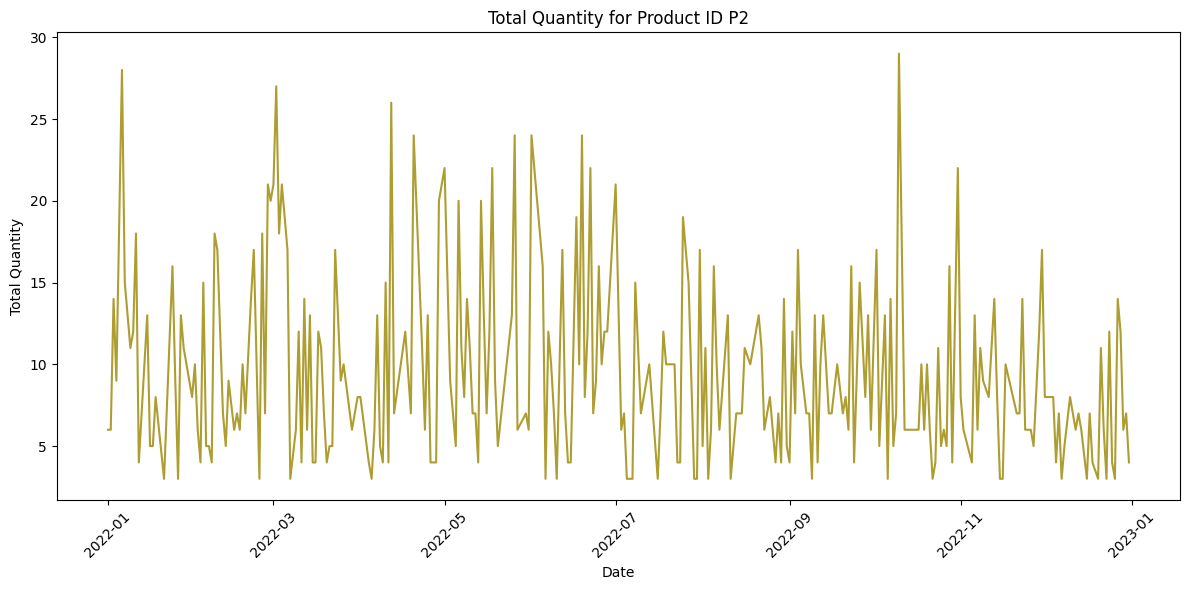

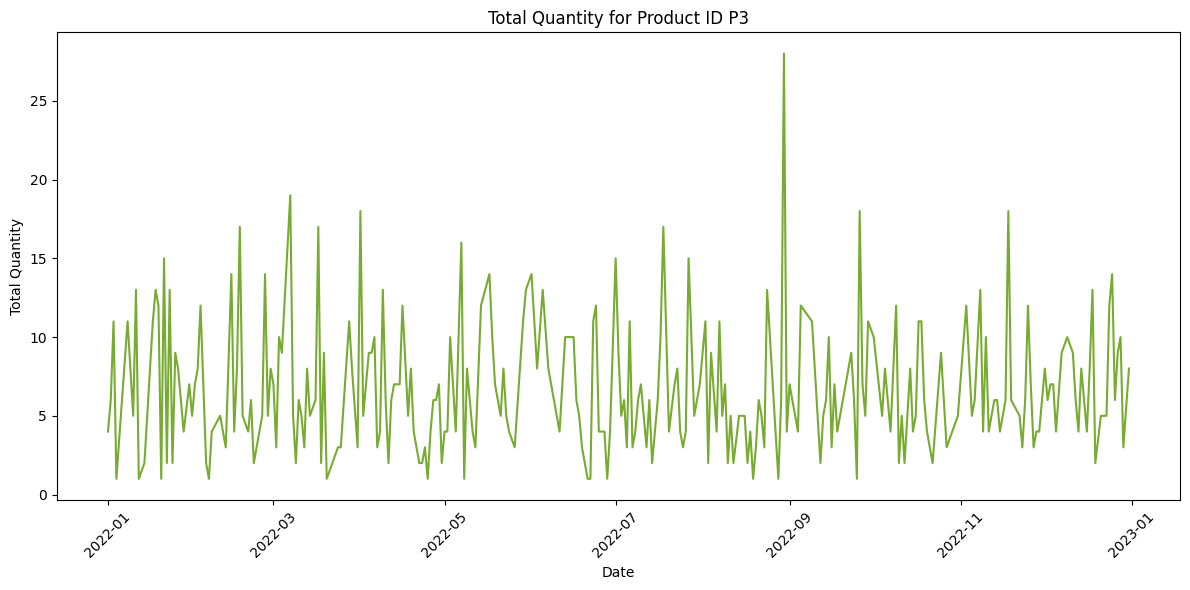

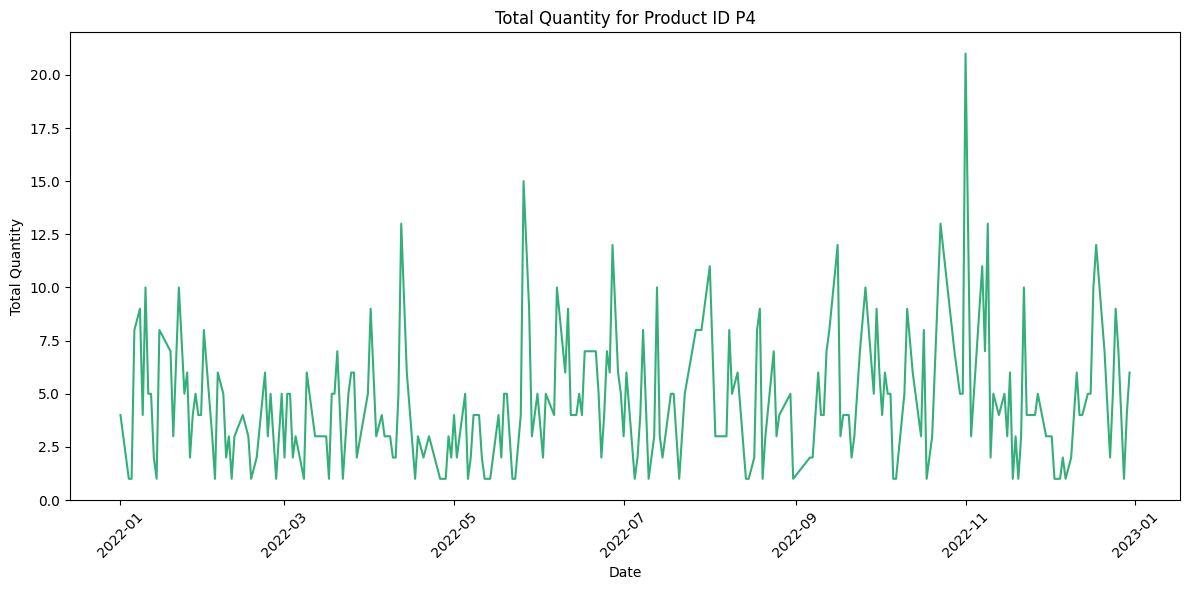

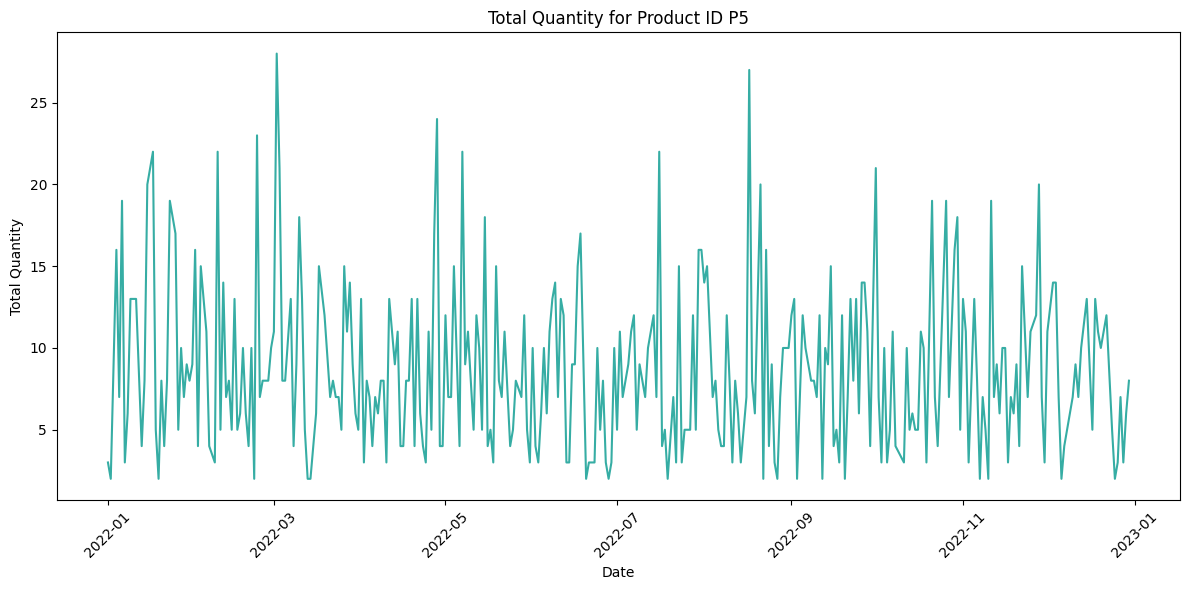

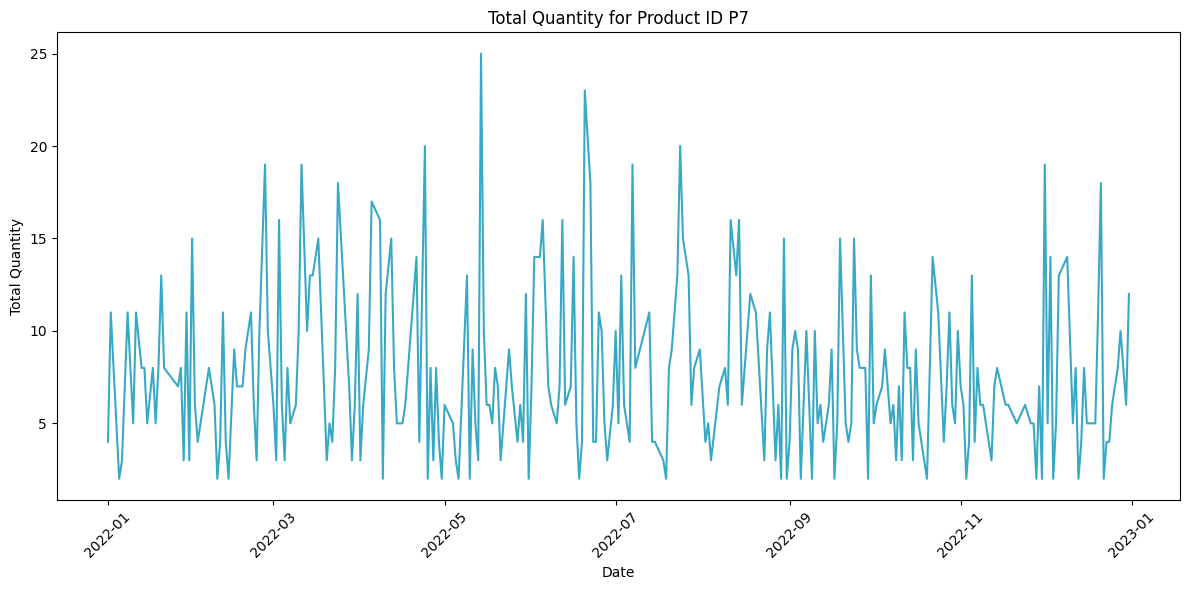

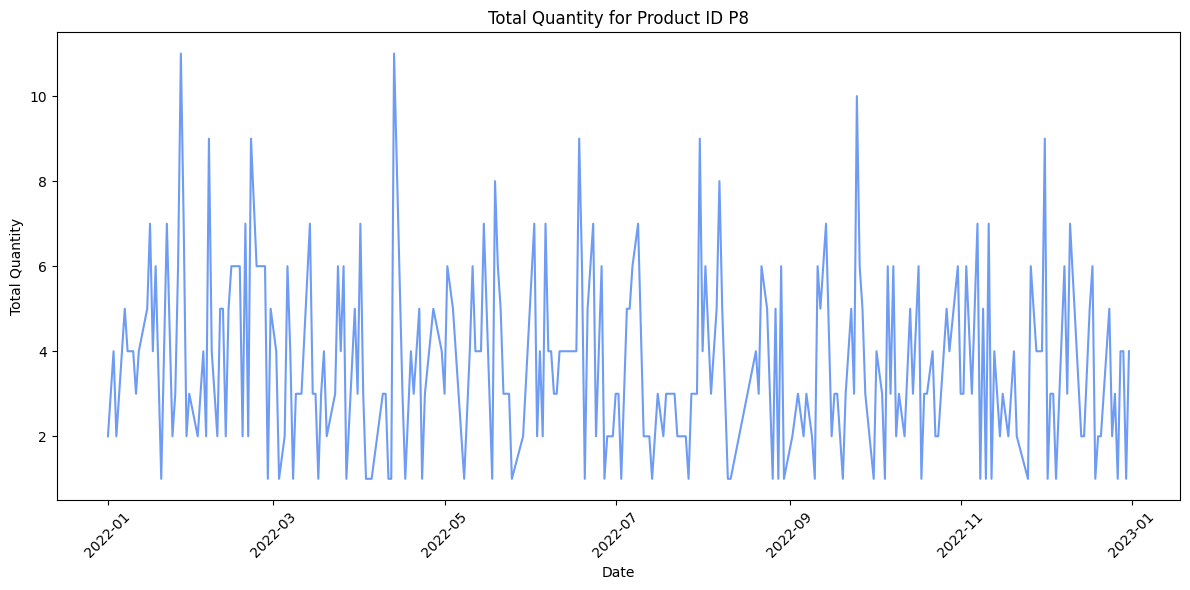

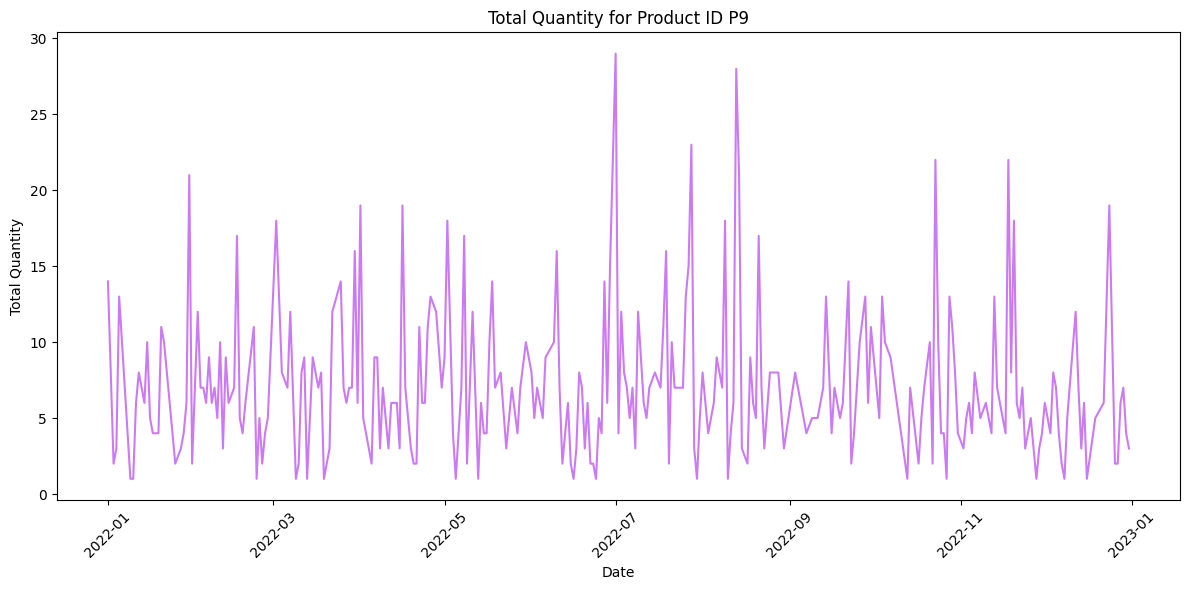

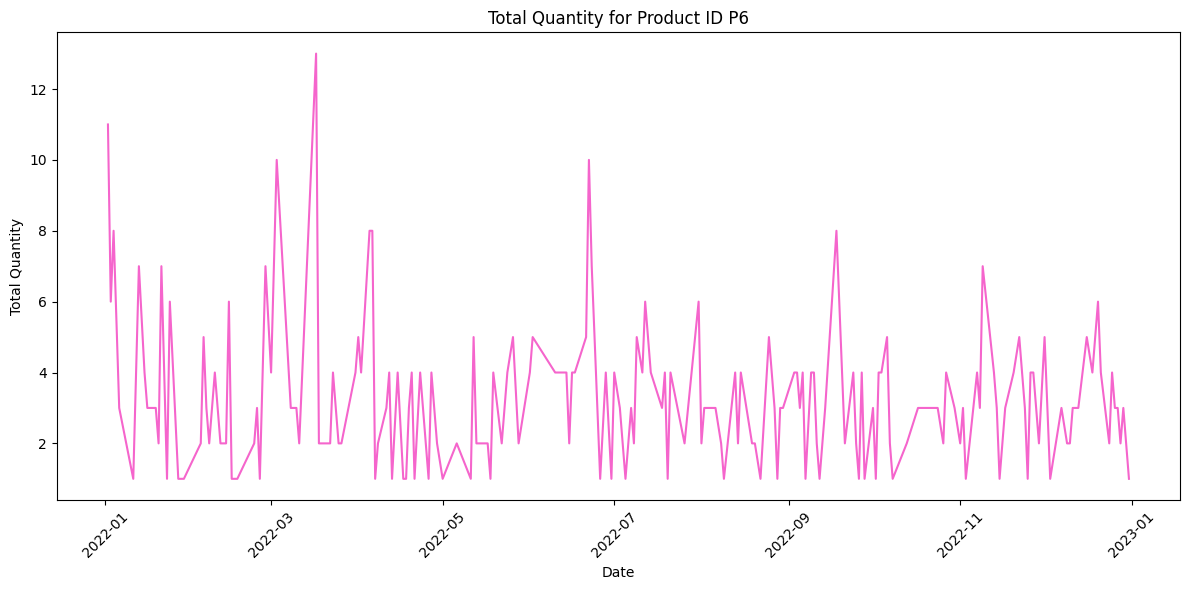

In [133]:
# Membuat plot terpisah untuk setiap product ID dengan warna yang berbeda
for idx, product_id in enumerate(product_ids):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Qty', data=df[df['ProductID'] == product_id], color=color_palette[idx])
    plt.title(f'Total Quantity for Product ID {product_id}')
    plt.xlabel('Date')
    plt.ylabel('Total Quantity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [143]:
df

,Date,ProductID,Qty
0,2022-01-01,P1,11
1,2022-01-01,P10,1
2,2022-01-01,P2,6
3,2022-01-01,P3,4
4,2022-01-01,P4,4
...,...,...,...
2661,2022-12-31,P3,8
2662,2022-12-31,P6,1
2663,2022-12-31,P7,12
2664,2022-12-31,P8,4


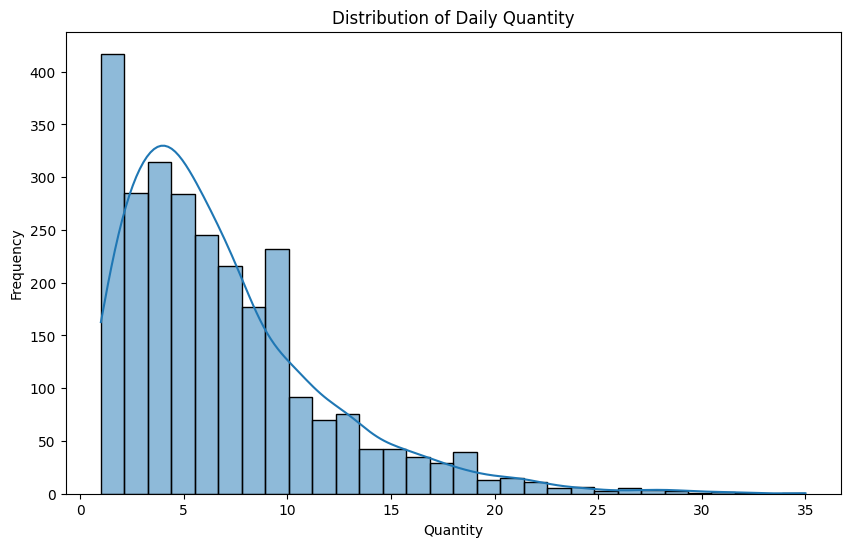

In [134]:
# Distribusi Jumlah Quantity
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Qty', bins=30, kde=True)
plt.title('Distribution of Daily Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

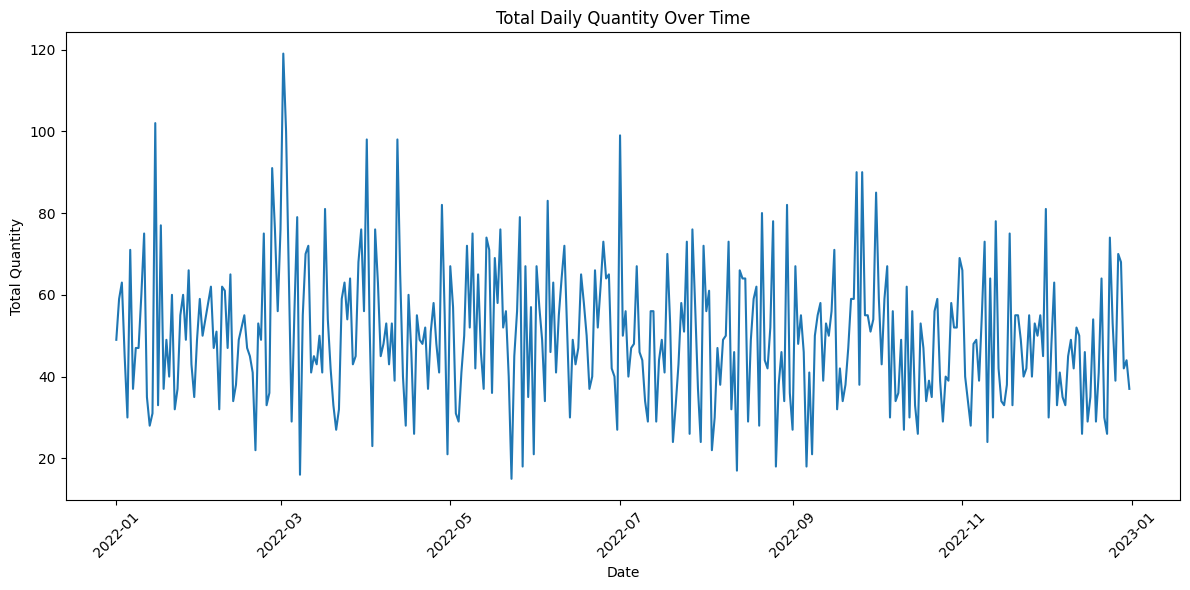

In [135]:
# Tren Waktu
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Qty', data=df.groupby('Date')['Qty'].sum().reset_index())
plt.title('Total Daily Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

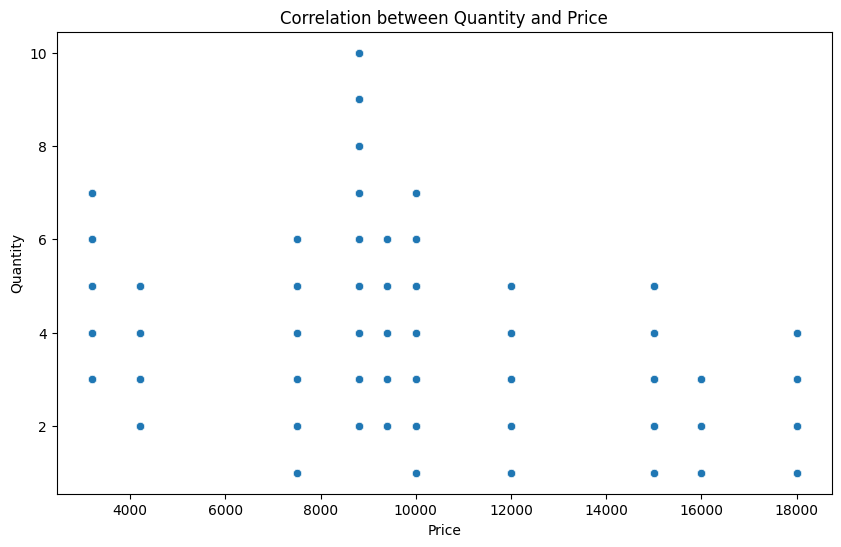

In [139]:
# Korelasi antara Quantity dengan Harga
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_x', y='Qty', data=df_merge)
plt.title('Correlation between Quantity and Price')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

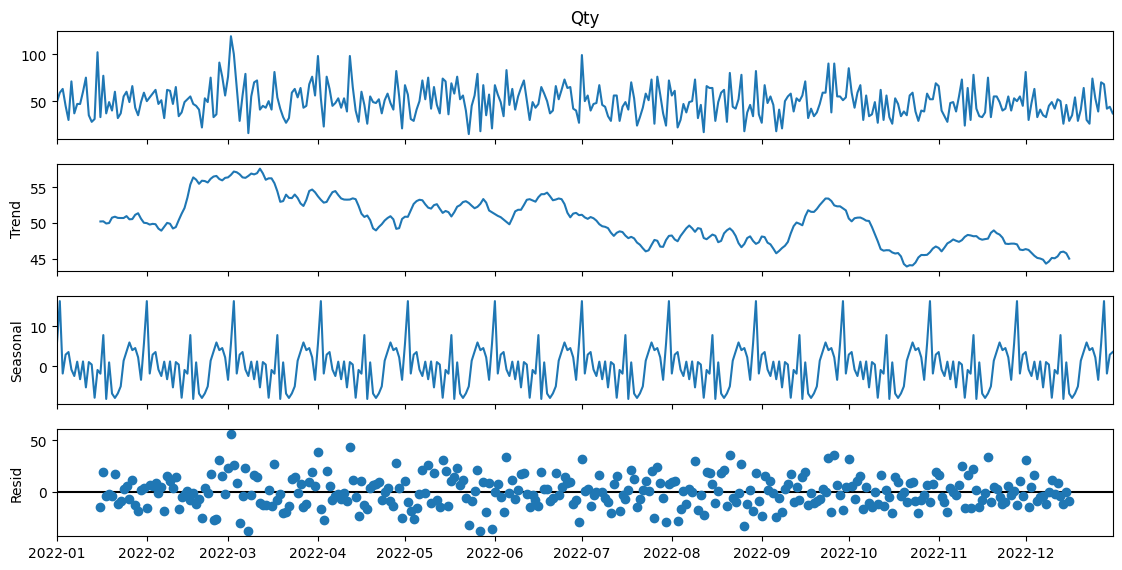

In [141]:
# Decompose Time Series
decomposition = seasonal_decompose(df.groupby('Date')['Qty'].sum(), period=30)  # Misalnya, periode musiman 30 hari
fig = decomposition.plot()
fig.set_size_inches(12, 6)
plt.show()

In [144]:
df

,Date,ProductID,Qty
0,2022-01-01,P1,11
1,2022-01-01,P10,1
2,2022-01-01,P2,6
3,2022-01-01,P3,4
4,2022-01-01,P4,4
...,...,...,...
2661,2022-12-31,P3,8
2662,2022-12-31,P6,1
2663,2022-12-31,P7,12
2664,2022-12-31,P8,4


## Others

In [ ]:
# Distribusi Jumlah Quantity
plt.figure(figsize=(10, 6))
sns.histplot(data=daily_combined, x='quantity', bins=30, kde=True)
plt.title('Distribution of Daily Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Tren Waktu
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='quantity', data=daily_combined.groupby('date')['quantity'].sum().reset_index())
plt.title('Total Daily Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Korelasi antara Quantity dengan Harga (contoh, jika ada data harga)
merged_data = pd.merge(daily_combined, price_data, on=['date', 'product_id'], how='left')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='quantity', data=merged_data)
plt.title('Correlation between Quantity and Price')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

# Decompose Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(daily_combined.groupby('date')['quantity'].sum(), period=30)  # Misalnya, periode musiman 30 hari
fig = decomposition.plot()
fig.set_size_inches(12, 6)
plt.show()


Tentu, setelah melakukan visualisasi dari jumlah qty setiap product ID, langkah selanjutnya dalam Exploratory Data Analysis (EDA) bisa mencakup beberapa aspek tambahan seperti:

- Distribusi Jumlah Quantity: Melihat distribusi jumlah quantity secara keseluruhan atau per product ID. Ini bisa dilakukan dengan histogram atau density plot.
- Tren Waktu: Selain melihat jumlah quantity per harian, kita bisa mengidentifikasi tren waktu, pola harian, mingguan, atau bulanan.
- Outlier: Identifikasi adanya outlier yang mungkin mempengaruhi analisis kita.
- Korelasi: Mengecek apakah ada korelasi antara tanggal atau periode tertentu dengan jumlah quantity.
- Musimality: Apakah terdapat pola musiman dalam data?
- Analisis Lag: Apakah jumlah quantity hari ini berkaitan dengan jumlah quantity beberapa hari sebelumnya?
- Bandingkan dengan Data Lain: Apakah ada faktor eksternal seperti promo, liburan, atau event tertentu yang dapat mempengaruhi jumlah quantity?
- Deskripsi Statistik Tambahan: Mendapatkan informasi statistik seperti rata-rata, median, dll. bisa memberikan wawasan tambahan tentang data.
- Korelasi dengan Variabel Lain: Jika ada data tambahan seperti harga produk, dapat dilihat apakah adanya korelasi antara harga dan jumlah quantity.
- Decompose Time Series: Melakukan decompose pada time series menjadi komponen-komponen seperti tren, musim, dan residu.
- Analisis Keterlambatan: Apakah ada keterlambatan antara perubahan jumlah quantity dengan event-event tertentu?

In [104]:
# Set Index
# df = df.set_index('Date')
# df.index = pd.to_datetime(df.index, format="%d/%m/%Y")
# df = df.sort_index()

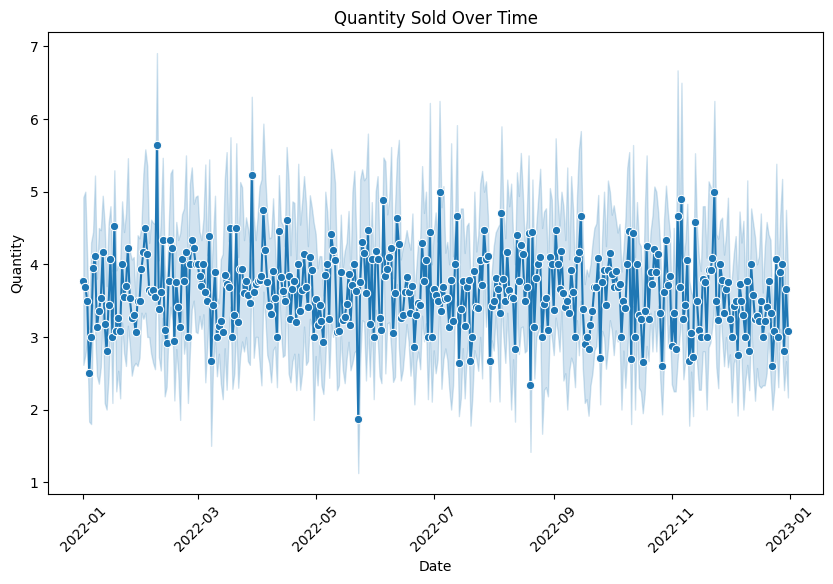

In [105]:
# Visualisasi data waktu
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Qty', data=df, marker='o')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quantity Sold Over Time')
plt.xticks(rotation=45)
plt.show()

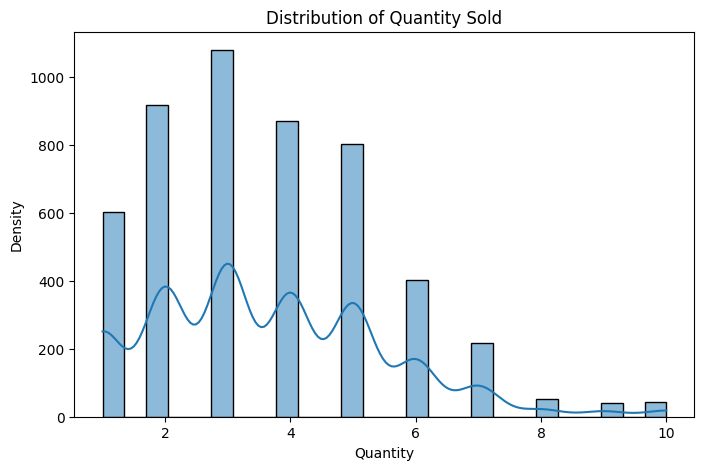

In [107]:
# Distribusi jumlah produk terjual
plt.figure(figsize=(8, 5))
sns.histplot(df['Qty'], kde=True)
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.title('Distribution of Quantity Sold')
plt.show()

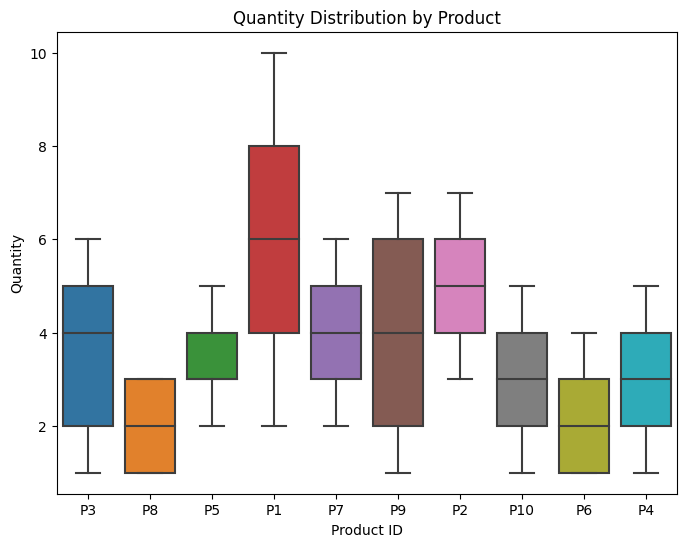

In [108]:
# Korelasi antara quantity dan product_id
plt.figure(figsize=(8, 6))
sns.boxplot(x='ProductID', y='Qty', data=df)
plt.xlabel('Product ID')
plt.ylabel('Quantity')
plt.title('Quantity Distribution by Product')
plt.show()

In [66]:
# Menampilkan total baris dan kolom
print(f'Total baris pada datset : {df.shape[0]}')
print(f'Total kolom pada datset : {df.shape[1]}')

Total baris pada datset : 5020
Total kolom pada datset : 19


In [67]:
# Menampilkan informasi kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Age             5020 non-null   int64 
 9   Gender          5020 non-null   int64 
 10  Marital Status  4976 non-null   object
 11  Income          5020 non-null   object
 12  Product Name    5020 non-null   object
 13  Price_y         5020 non-null   int64 
 14  StoreName       5020 non-null   object
 15  GroupStore      5020 non-null   object
 16  Type            5020 non-null   object
 17  Latitude        5020 non-null   object
 18  Longitud

In [68]:
# Melihat 5 data teratas
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


In [69]:
# Mengecek missing value
df.isnull().sum()

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price_x            0
Qty                0
TotalAmount        0
StoreID            0
Age                0
Gender             0
Marital Status    44
Income             0
Product Name       0
Price_y            0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
dtype: int64

In [70]:
# Menghapus missing value
df = df.dropna()

In [71]:
# Menghapus data duplicate
df = df.drop_duplicates()

In [82]:
for i, row in df.iterrows(): 
    if i == i-1:
        print(row['Date'])
        print(row['ProductID'])
        print(row['Qty'])

In [50]:
df.head()

,TransactionID,CustomerID,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
Date,,,,,,,,,,,,,,,,,,
2022-01-01,TR11369,328,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2022-01-01,TR35256,160,P1,8800,7,61600,4,48,1,Married,"12,57",Choco Bar,8800,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
2022-01-01,TR76340,287,P4,12000,4,48000,12,36,0,Single,"3,7",Potato Chip,12000,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2022-01-01,TR7596,270,P7,9400,2,18800,14,49,1,Married,"8,81",Coffee Candy,9400,Priangan,Priangan,Modern Trade,"-5,45","105,26667"
2022-01-01,TR54287,51,P8,16000,2,32000,2,36,0,Married,"7,95",Oat,16000,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"


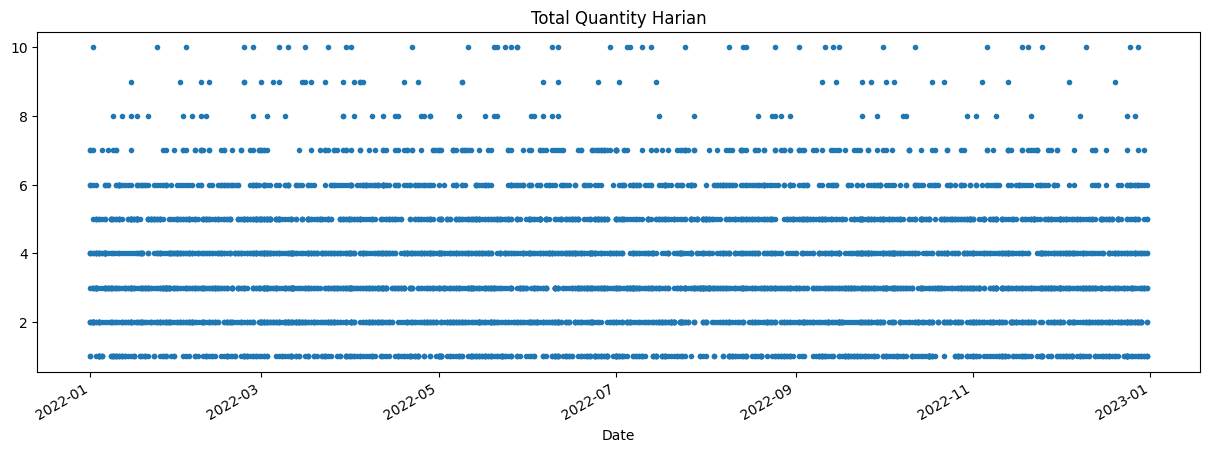

In [51]:
# Menampilkan grafik dataset
df['Qty'].plot(style='.',
        figsize=(15, 5),
        title='Total Quantity Harian')
plt.show()

## Modeling

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# Split Data
train_size = int(len(daily_combined) * 0.8)
train_data, test_data = daily_combined[:train_size], daily_combined[train_size:]

# Order Determination
# ... (gunakan metode ACF, PACF, atau yang lainnya untuk menentukan p, d, q)

# Train ARIMA Model
p, d, q = 1, 1, 1  # Ganti dengan nilai yang sesuai
model = ARIMA(train_data['quantity'], order=(p, d, q))
model_fit = model.fit(disp=0)

# Forecast
forecast, stderr, conf_int = model_fit.forecast(steps=len(test_data))

# Calculate RMSE
rmse = mean_squared_error(test_data['quantity'], forecast, squared=False)
print(f"RMSE: {rmse}")

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train_data['date'], train_data['quantity'], label='Train Data')
plt.plot(test_data['date'], test_data['quantity'], label='Test Data')
plt.plot(test_data['date'], forecast, label='Forecast', color='red')
plt.fill_between(test_data['date'], forecast - 1.96 * stderr, forecast + 1.96 * stderr, color='r', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()
